In [1]:
import numpy as np
import pandas as pd

Read Database

In [2]:
covidData_csv = pd.read_csv('D:\Self_work\Covid_Data.csv')

Data Cleaning

In [3]:
covidData_csv['patient_no'] = covidData_csv.index

In [4]:
covidData_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

Renaming some of the columns

In [5]:
covidData_csv.rename({'patient_no': 'PATIENT_NO', 'HIPERTENSION': 'HYPERTENSION'}, axis=1, inplace=True)

In [6]:
covidData_csv.rename({'CLASIFFICATION_FINAL': 'CLASSIFICATION_FINAL'}, axis=1, inplace=True)

In [7]:
covidData_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HYPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [8]:
ICU_values = covidData_csv['ICU'].value_counts()

In [9]:
ICU_values

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

In [10]:
((ICU_values[97] + ICU_values[99])/len(covidData_csv)) * 100

81.6376510979186

In [11]:
intubed_values = covidData_csv['INTUBED'].value_counts()

In [12]:
intubed_values

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

In [13]:
((intubed_values[97] + intubed_values[99])/len(covidData_csv)) * 100

81.62210619173639

81% of 'INTUBED' and 'ICU' columns are missing. The columns will be dropped.

In [14]:
covidData_csv.drop(['ICU','INTUBED'], axis = 1, inplace= True)

In [15]:
covidData_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   PNEUMONIA             1048575 non-null  int64 
 6   AGE                   1048575 non-null  int64 
 7   PREGNANT              1048575 non-null  int64 
 8   DIABETES              1048575 non-null  int64 
 9   COPD                  1048575 non-null  int64 
 10  ASTHMA                1048575 non-null  int64 
 11  INMSUPR               1048575 non-null  int64 
 12  HYPERTENSION          1048575 non-null  int64 
 13  OTHER_DISEASE         1048575 non-null  int64 
 14  CARDIOVASCULAR        1048575 non-null  int64 
 15

Exploratory Data Analysis

In [16]:
values_of_covid = covidData_csv['CLASSIFICATION_FINAL'].value_counts()

In [17]:
values_of_covid[1]+values_of_covid[2] + values_of_covid[3]

391979

In [18]:
((values_of_covid[1]+values_of_covid[2] + values_of_covid[3])/len(covidData_csv))* 100

37.38206613737692

Percentage of people diagnosed with covid-19 is 37.38%

In [19]:
died_value = covidData_csv['DATE_DIED'].value_counts()

In [20]:
died_value

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [21]:
(1-(died_value['9999-99-99'])/len(covidData_csv)) * 100

7.337767923133775

This is done as the people who haven't died have the date value '9999-99-99' in the dataset 

7.33% of all people in the dataset have died due to covid-19.

In [36]:
classification_1_datedied = covidData_csv[covidData_csv['CLASSIFICATION_FINAL']==2]['DATE_DIED'].value_counts()

All the patients with classification as 2 have died

In [24]:
classification_3_datedied = covidData_csv[covidData_csv['CLASSIFICATION_FINAL']==3]['DATE_DIED'].value_counts()

In [25]:
classification_1_datedied = covidData_csv[covidData_csv['CLASSIFICATION_FINAL']==1]['DATE_DIED'].value_counts()

In [26]:
(1-(classification_1_datedied['9999-99-99']/len(covidData_csv[covidData_csv['CLASSIFICATION_FINAL']==1]['DATE_DIED'])))*100

11.103360074409952

11.1% of patients with classficiation 1 have died

In [27]:
(1-(classification_3_datedied['9999-99-99']/len(covidData_csv[covidData_csv['CLASSIFICATION_FINAL']==3]['DATE_DIED'])))*100

13.480042041585527

13.5% of patients with classification 3 have died

In [28]:
classification_4_datedied = covidData_csv[covidData_csv['CLASSIFICATION_FINAL']==4]['DATE_DIED'].value_counts()

In [29]:
(1-(classification_4_datedied['9999-99-99']/len(covidData_csv[covidData_csv['CLASSIFICATION_FINAL']==4]['DATE_DIED'])))*100

4.74055092889174

4.7% of patients with classification 4 have died

In [30]:
classification_5_datedied = covidData_csv[covidData_csv['CLASSIFICATION_FINAL']==5]['DATE_DIED'].value_counts()

In [31]:
(1-(classification_5_datedied['9999-99-99']/len(covidData_csv[covidData_csv['CLASSIFICATION_FINAL']==5]['DATE_DIED'])))*100

4.641447242344099

4.6% of patients with classification 5 have died

In [32]:
classification_6_datedied = covidData_csv[covidData_csv['CLASSIFICATION_FINAL']==6]['DATE_DIED'].value_counts()

In [33]:
(1-(classification_6_datedied['9999-99-99']/len(covidData_csv[covidData_csv['CLASSIFICATION_FINAL']==6]['DATE_DIED'])))*100

5.97191980208065

6% of patients with classification 6 have died

In [34]:
classification_7_datedied = covidData_csv[covidData_csv['CLASSIFICATION_FINAL']==7]['DATE_DIED'].value_counts()

In [35]:
(1-(classification_7_datedied['9999-99-99']/len(covidData_csv[covidData_csv['CLASSIFICATION_FINAL']==7]['DATE_DIED'])))*100

2.743114672008007

2.74% of patients with classification 7 have died

In [39]:
covidData_csv['MEDICAL_UNIT'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64)

There are 13 medical units in the dataset

In [41]:
from collections import Counter
print(Counter(covidData_csv['MEDICAL_UNIT']))

Counter({12: 602995, 4: 314405, 6: 40584, 9: 38116, 3: 19175, 8: 10399, 10: 7873, 5: 7244, 11: 5577, 13: 996, 7: 891, 2: 169, 1: 151})


In [46]:
Counter(covidData_csv[covidData_csv['DATE_DIED']!='9999-99-99']['MEDICAL_UNIT'])

Counter({1: 5,
         2: 5,
         3: 1492,
         4: 39905,
         5: 607,
         6: 5790,
         7: 40,
         8: 1171,
         9: 1369,
         10: 1468,
         11: 409,
         12: 24620,
         13: 61})

Above are the number of people who died in each medical unit

Text(0.5, 1.0, 'Ages of the people who contracted COVID')

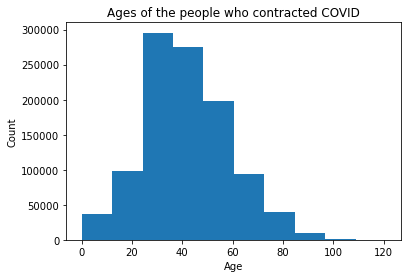

In [57]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(covidData_csv['AGE'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Ages of the people who contracted COVID')

Text(0.5, 1.0, 'Ages of the people who died due to COVID')

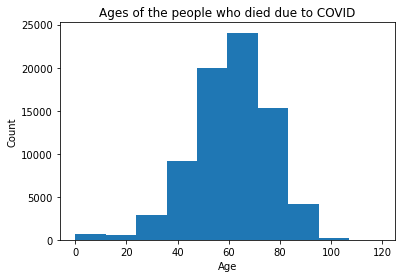

In [58]:
plt.hist(covidData_csv[covidData_csv['DATE_DIED']!='9999-99-99']['AGE'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Ages of the people who died due to COVID')

In [72]:
all_count = covidData_csv.groupby('AGE',)['USMER'].count()

In [74]:
died_count=covidData_csv[covidData_csv['DATE_DIED']!='9999-99-99'].groupby('AGE',)['USMER'].count()

In [87]:
(died_count/all_count).sort_values(ascending=False)

AGE
83     0.394082
87     0.387144
80     0.386915
84     0.384502
81     0.381431
         ...   
116         NaN
117         NaN
118         NaN
120         NaN
121         NaN
Name: USMER, Length: 121, dtype: float64

Most at risk COVID patients are people in their 80s.

Text(0.5, 0, 'Age')

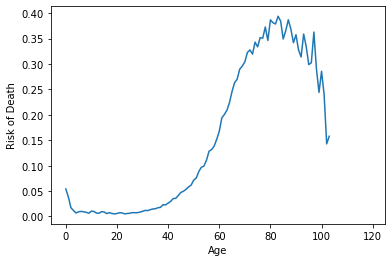

In [95]:
plt.plot(died_count/all_count)
plt.ylabel('Risk of Death')
plt.xlabel('Age')